In [66]:
import pandas as pd

In [67]:
data = pd.read_csv('Data/corrected_artDataset.csv')

extracting 150 random rows for a new dataset

In [68]:
# Take a random sample of 150 rows
random_sample = data.sample(n=150, random_state=42) 

In [69]:
# Save the random sample to a new CSV file
random_sample.to_csv('Data/random_sample_dataset.csv', index=False)

In [70]:
random_sample.head()

,id_image,price,artist,title,yearCreation,signed,condition,period,movement,price_amount,price_currency,clean_yearCreation,filename,clean_signed
587,587,1.500 USD,Keith Jacobshagen,Evening XXIII,1990,Signed K JACOBSHAGEN in ink at lower right recto,This work is in very good condition.Artwork no...,Post-War,Expressionism,1500,USD,1990.0,../Art_Price/images/artDataset/image_588.png,Yes
259,259,9.500 USD,Yong Jo Ji,Nirvana,2014,[nan],Overall excellent condition.,Contemporary,Abstract,9500,USD,2014.0,../Art_Price/images/artDataset/image_260.png,No
653,653,1.275 USD,Mary Heebner,Powder,1979,Heebner 79 inscribed on bottom right,This work is in good condition.Not examined ou...,Modern,Abstract,1275,USD,1979.0,../Art_Price/images/artDataset/image_654.png,No
77,77,2.500 USD,Doris McCarthy,funzionario,2021,[nan],Excellent condition.,Contemporary,Abstract,2500,USD,2021.0,../Art_Price/images/artDataset/image_78.png,No
213,213,13.000 USD,Jim Dine,Cream and Red Robe on a Stone,2010,"Signed by artist and numbered, recto",Very good condition,Contemporary,Pop Art,13000,USD,2010.0,../Art_Price/images/artDataset/image_214.png,Yes


In [71]:
random_sample.shape

(150, 14)

applying manualy category of condition

In [72]:
random_sample['condition'].unique()

array(['This work is in very good condition.Artwork not examined outside of frame.Minor rippling of paper consistent with process.',
       'Overall excellent condition.',
       'This work is in good condition.Not examined outside of frame.No obvious signs wear to artMinor scrape to corner of frame.',
       'Excellent condition.', 'Very good condition', '[nan]',
       'This work is in good condition.Not examined outside of frame.Minor rippling to paper.No other obvious signs of wear to art.',
       'This work is in very good condition.Artwork not examined outside of frame.No obvious signs of wear to artwork.Scuff on top center of wood frame.',
       "This warm-toned print, on paper with a nearly matte, eggshell surface, is in generally good to very good condition.\xa0The following are visible: uneven, minor silvering; deposits of original retouching; a small loss and a sharp crease that appears to break the emulsion near the upper left corner; linear abrasions under the signature;

In [73]:
# Function to clean the condition description
def clean_condition(condition_text):
    if 'nan' in condition_text.lower():
        return 'unknown'
    elif 'very good condition' in condition_text.lower():
        return 'very good'
    elif 'ear consistent with age and use' in condition_text.lower():
        return 'very good'
    elif 'very good condition' and 'no obvious signs of wear' in condition_text.lower():
        return 'very good'
    elif 'excellent condition' in condition_text.lower():
        return 'excellent'
    elif 'unlined and tacked to the original stretchers' in condition_text.lower():
        return 'excellent'
    elif 'original condition' in condition_text.lower():
        return 'excellent'
    elif 'minor rippling' in condition_text.lower():
        return 'excellent' 
    elif 'no obvious signs of damage or wear' in condition_text.lower():
        return 'excellent' 
    elif 'good and stable condition'in condition_text.lower():
        return 'very good'
    elif 'occasional edge wear' in condition_text.lower():
        return 'very good'
    elif 'slightly dirty' in condition_text.lower():
        return 'very good'
    elif 'good condition' in condition_text.lower():
        return 'good'
    elif 'no obvious signs of wear' in condition_text.lower():
        return 'good'
    elif 'no visible signs of wear' in condition_text.lower():
        return 'good'
    elif 'no apparent signs of damage' in condition_text.lower():
        return 'good'
    elif 'slight oxidation' in condition_text.lower():
        return 'good'
    elif 'cracking to painting from age' in condition_text.lower():
        return 'good'
    elif 'creases from fold-marks' in condition_text.lower():
        return 'good'
    elif 'good condition' in condition_text.lower():
        return 'good'
    elif 'scratches throughout plexiglas' in condition_text.lower():
        return 'good'
    elif 'yellowing to frame' in condition_text.lower():
        return 'acceptable'
    elif 'occasional smudges and wear to corners' in condition_text.lower():
        return 'acceptable'
    elif 'creasing' and 'minor stains' in condition_text.lower():
        return 'acceptable'
    elif 'noticeable seam' in condition_text.lower():
        return 'acceptable'
    elif 'minor frame abrasion' and 'uneven varnish' in condition_text.lower():
        return 'acceptable'
    elif 'undulation to sheet' and 'water stain' in condition_text.lower():
        return 'acceptable'
    elif 'scratches to plexiglass' and 'sheet undulation' in condition_text.lower():
        return 'acceptable'
    elif 'loss to paint across the top of painting' in condition_text.lower():
        return 'acceptable'
    else:

        return condition_text


# Apply the function to create the new column 'clean_condition'
random_sample['category'] = random_sample['condition'].apply(clean_condition)

In [74]:
random_sample['category'].unique()

array(['very good', 'excellent', 'good', 'unknown', 'acceptable'],
      dtype=object)

In [75]:
random_sample['category'].value_counts()

category
excellent     60
very good     55
good          24
acceptable     8
unknown        3
Name: count, dtype: int64

<Axes: xlabel='category'>

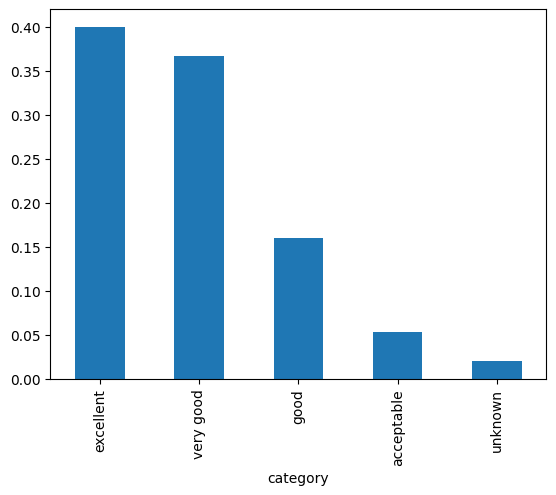

In [76]:
# check target balance

random_sample['category'].value_counts(normalize = True).plot.bar()

# create a list text
condition = list(random_sample['condition'])
# create a list text
condition = list(random_sample['condition'])
# preprocessing loop
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [77]:
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocessing(sentence):
    # Lowercasing
    sentence = sentence.lower()

    # Removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())
    
    # Removing punctuation    
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') 
    
    sentence = sentence.strip()

    # Tokenization
    tokenized = word_tokenize(sentence)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokenized]
    cleaned_sentence = " ".join(lemmatized)
    return cleaned_sentence

In [78]:
random_sample['cleaned_condition'] = random_sample['condition'].apply(preprocessing)

In [79]:
random_sample.head(2)

,id_image,price,artist,title,yearCreation,signed,condition,period,movement,price_amount,price_currency,clean_yearCreation,filename,clean_signed,category,cleaned_condition
587,587,1.500 USD,Keith Jacobshagen,Evening XXIII,1990,Signed K JACOBSHAGEN in ink at lower right recto,This work is in very good condition.Artwork no...,Post-War,Expressionism,1500,USD,1990.0,../Art_Price/images/artDataset/image_588.png,Yes,very good,this work is in very good conditionartwork not...
259,259,9.500 USD,Yong Jo Ji,Nirvana,2014,[nan],Overall excellent condition.,Contemporary,Abstract,9500,USD,2014.0,../Art_Price/images/artDataset/image_260.png,No,excellent,overall excellent condition


In [80]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
random_sample['category_encoded'] = label_encoder.fit_transform(random_sample['category'])
random_sample.head(5)

,id_image,price,artist,title,yearCreation,signed,condition,period,movement,price_amount,price_currency,clean_yearCreation,filename,clean_signed,category,cleaned_condition,category_encoded
587,587,1.500 USD,Keith Jacobshagen,Evening XXIII,1990,Signed K JACOBSHAGEN in ink at lower right recto,This work is in very good condition.Artwork no...,Post-War,Expressionism,1500,USD,1990.0,../Art_Price/images/artDataset/image_588.png,Yes,very good,this work is in very good conditionartwork not...,4
259,259,9.500 USD,Yong Jo Ji,Nirvana,2014,[nan],Overall excellent condition.,Contemporary,Abstract,9500,USD,2014.0,../Art_Price/images/artDataset/image_260.png,No,excellent,overall excellent condition,1
653,653,1.275 USD,Mary Heebner,Powder,1979,Heebner 79 inscribed on bottom right,This work is in good condition.Not examined ou...,Modern,Abstract,1275,USD,1979.0,../Art_Price/images/artDataset/image_654.png,No,good,this work is in good conditionnot examined out...,2
77,77,2.500 USD,Doris McCarthy,funzionario,2021,[nan],Excellent condition.,Contemporary,Abstract,2500,USD,2021.0,../Art_Price/images/artDataset/image_78.png,No,excellent,excellent condition,1
213,213,13.000 USD,Jim Dine,Cream and Red Robe on a Stone,2010,"Signed by artist and numbered, recto",Very good condition,Contemporary,Pop Art,13000,USD,2010.0,../Art_Price/images/artDataset/image_214.png,Yes,very good,very good condition,4


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

vectorizer = CountVectorizer()
naivebayes = MultinomialNB()

X_bow = vectorizer.fit_transform(random_sample['cleaned_condition'])

cv_nb = cross_validate(
    naivebayes,
    X_bow,
    random_sample['category_encoded'],
    scoring = "accuracy"
)

round(cv_nb['test_score'].mean(),2)

C:\Users\antoa\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.73

In [82]:
vectorizer = CountVectorizer(ngram_range = (2,2))
naivebayes = MultinomialNB()

X_bow = vectorizer.fit_transform(random_sample['cleaned_condition'])

cv_nb = cross_validate(
    naivebayes,
    X_bow,
    random_sample['category_encoded'],
    scoring = "accuracy"
)

round(cv_nb['test_score'].mean(),2)

C:\Users\antoa\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.72

-------------------------------------------------------------------------------------------------------------------------------------------------

In [83]:
import re 
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2


In [84]:
stemmer = SnowballStemmer('english')
words = stopwords.words('english')

In [85]:
random_sample['cleanned'] = random_sample['condition'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-A]", " ", x).split() if i not in words]).lower())

In [86]:
X_train, X_test, y_train, y_test = train_test_split(random_sample['cleanned'], random_sample['category'], test_size=0.2, random_state=42)

In [87]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3), stop_words="english", sublinear_tf=True)),
    ('chi', SelectKBest(chi2, k='all')),
    ('clf', LinearSVC(C=1.0, penalty='l1', max_iter=3000, dual=False))
])

In [88]:
model=pipeline.fit(X_train, y_train)

In [89]:
vectorizer_d = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['clf']

In [90]:
feature_names = vectorizer_d.get_feature_names_out()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)

In [91]:
print('accuracy score ' + str(model.score(X_test, y_test)))


accuracy score 0.8333333333333334


In [92]:
print(model.predict((['The canvas is unlined and tacked to the original stretchers. Under UV: There are no signs of inpainting or previous restoration.'])))

['good']


In [93]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(120, 300)

In [94]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)




# transform X_test using CV

X_test_cv = cv.transform(X_test)




# generate predictions

predictions = lr.predict(X_test_cv)

predictions

array(['good', 'excellent', 'excellent', 'very good', 'acceptable',
       'good', 'excellent', 'excellent', 'good', 'good', 'very good',
       'very good', 'excellent', 'very good', 'very good', 'excellent',
       'excellent', 'very good', 'very good', 'excellent', 'good', 'good',
       'very good', 'excellent', 'very good', 'excellent', 'very good',
       'excellent', 'excellent', 'good'], dtype=object)

In [95]:
# confusion matrix

import pandas as pd

from sklearn import metrics
class_label = ['good', 'very good', 'excellent', 'acceptable']
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=class_label, columns=class_label)

df

,good,very good,excellent,acceptable
good,0,0,1,0
very good,0,12,0,2
excellent,1,0,3,0
acceptable,0,0,3,8


______________________________

In [96]:
condition_col = data['condition']
predict_cat = model.predict(condition_col)
data['category'] = predict_cat

In [97]:
data.head(3)

,id_image,price,artist,title,yearCreation,signed,condition,period,movement,price_amount,price_currency,clean_yearCreation,filename,clean_signed,category
0,0,28.500 USD,Tommaso Ottieri,Bayreuth Opera,2021,Signed on verso,This work is in excellent condition.,Contemporary,Baroque,28500,USD,2021.0,../Art_Price/images/artDataset/image_1.png,Yes,good
1,1,3.000 USD,Pavel Tchelitchew,Drawings of the Opera,First Half 20th Century,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism,3000,USD,NaN,../Art_Price/images/artDataset/image_2.png,Yes,very good
2,2,5.000 USD,Leo Gabin,Two on Sidewalk,2016,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract,5000,USD,2016.0,../Art_Price/images/artDataset/image_3.png,Yes,good


_________________________________________________________________________________________________________________________________________________


In [98]:
data.to_csv('Data/nlp_artDataset.csv', index=False)


In [149]:
data['category'].value_counts()

category
good          487
very good     234
acceptable     26
unknown         7
Name: count, dtype: int64

In [99]:
random_sample['category'].value_counts()

category
excellent     60
very good     55
good          24
acceptable     8
unknown        3
Name: count, dtype: int64

In [100]:
X = random_sample['condition']
y =random_sample['category']
len(X)

150

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
len(X_train)

120

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


pipeMNB = Pipeline([('tfid', TfidfVectorizer()),('clf', MultinomialNB())])
pipeCNB = Pipeline([('tfid', TfidfVectorizer()),('clf', ComplementNB())])
pipeSVC = Pipeline([('tfid', TfidfVectorizer()),('clf', LinearSVC())])

In [104]:
pipeMNB.fit(X_train, y_train)
predictMNB = pipeMNB.predict(X_test)
predictMNB

array(['very good', 'excellent', 'excellent', 'very good', 'very good',
       'very good', 'excellent', 'very good', 'very good', 'very good',
       'very good', 'very good', 'excellent', 'very good', 'very good',
       'excellent', 'excellent', 'very good', 'very good', 'excellent',
       'very good', 'excellent', 'very good', 'excellent', 'very good',
       'excellent', 'very good', 'excellent', 'excellent', 'very good'],
      dtype='<U10')

In [105]:
print(f'MNB: {accuracy_score(y_test, predictMNB): .2f}')

MNB:  0.70


In [106]:
pipeCNB.fit(X_train, y_train)
predictCNB = pipeCNB.predict(X_test)
print(f'CNB: {accuracy_score(y_test, predictCNB): .2f}')
pipeSVC.fit(X_train, y_train)
predictSVC = pipeSVC.predict(X_test)
print(f'SVC: {accuracy_score(y_test, predictSVC): .2f}')


CNB:  0.77
SVC:  0.80


C:\Users\antoa\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [107]:
print(classification_report(y_test, predictSVC))

              precision    recall  f1-score   support

  acceptable       0.00      0.00      0.00         1
   excellent       1.00      0.86      0.92        14
        good       0.67      0.50      0.57         4
   very good       0.77      0.91      0.83        11

    accuracy                           0.80        30
   macro avg       0.61      0.57      0.58        30
weighted avg       0.84      0.80      0.81        30



In [108]:
pipeMNBstop = Pipeline([('tfid', TfidfVectorizer(stop_words='english')),('clf', MultinomialNB())])
pipeCNBstop = Pipeline([('tfid', TfidfVectorizer(stop_words='english')),('clf', ComplementNB())])
pipeSVCstop = Pipeline([('tfid', TfidfVectorizer(stop_words='english')),('clf', LinearSVC())])

In [109]:
pipeMNBstop.fit(X_train, y_train)
predictMNBstop = pipeMNBstop.predict(X_test)
print(f'MNBstop: {accuracy_score(y_test, predictMNBstop): .2f}')
pipeCNBstop.fit(X_train, y_train)
predictCNBstop = pipeCNBstop.predict(X_test)
print(f'CNBstop: {accuracy_score(y_test, predictCNBstop): .2f}')
pipeSVCstop.fit(X_train, y_train)
predictSVCstop = pipeSVCstop.predict(X_test)
print(f'SVCstop: {accuracy_score(y_test, predictSVCstop): .2f}')

MNBstop:  0.70
CNBstop:  0.70
SVCstop:  0.77


C:\Users\antoa\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [110]:
pipeMNBstopngram = Pipeline([('tfid', TfidfVectorizer(stop_words='english', ngram_range=(1,3))),('clf', MultinomialNB())])
pipeCNBstopngram = Pipeline([('tfid', TfidfVectorizer(stop_words='english', ngram_range=(1,3))),('clf', ComplementNB())])
pipeSVCstopngram = Pipeline([('tfid', TfidfVectorizer(stop_words='english', ngram_range=(1,3))),('clf', LinearSVC())])

In [111]:
pipeMNBstopngram.fit(X_train, y_train)
predictMNBstopngram = pipeMNBstopngram.predict(X_test)
print(f'MNBstop: {accuracy_score(y_test, predictMNBstopngram): .2f}')
pipeCNBstopngram.fit(X_train, y_train)
predictCNBstopngram = pipeCNBstopngram.predict(X_test)
print(f'CNBstop: {accuracy_score(y_test, predictCNBstopngram): .2f}')
pipeSVCstopngram.fit(X_train, y_train)
predictSVCstopngram = pipeSVCstopngram.predict(X_test)
print(f'SVCstop: {accuracy_score(y_test, predictSVCstopngram): .2f}')

MNBstop:  0.80
CNBstop:  0.77
SVCstop:  0.80


C:\Users\antoa\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [112]:
MNBstopngram = Pipeline([('tfid', TfidfVectorizer(stop_words='english', ngram_range=(1,3))),('clf', MultinomialNB())])
CNBstopngram = Pipeline([('tfid', TfidfVectorizer(ngram_range=(1,3))),('clf', ComplementNB())])
SVCstopngram = Pipeline([('tfid', TfidfVectorizer(ngram_range=(1,3))),('clf', LinearSVC())])

In [113]:
MNBstopngram.fit(X_train, y_train)
PMNBstopngram = MNBstopngram.predict(X_test)
print(f'MNBstop: {accuracy_score(y_test, PMNBstopngram): .2f}')
CNBstopngram.fit(X_train, y_train)
PCNBstopngram = CNBstopngram.predict(X_test)
print(f'CNBstop: {accuracy_score(y_test, PCNBstopngram): .2f}')
SVCstopngram.fit(X_train, y_train)
PSVCstopngram = SVCstopngram.predict(X_test)
print(f'SVCstop: {accuracy_score(y_test, PSVCstopngram): .2f}')

MNBstop:  0.80
CNBstop:  0.77
SVCstop:  0.80


C:\Users\antoa\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


________________________________________


In [114]:
data_cat = pd.read_csv('Data/nlp_artDataset.csv')

In [115]:
data_cat['category'].unique()

array(['good', 'very good', 'acceptable', 'unknown'], dtype=object)

In [116]:
# Création du tableau croisé
pivot_table_result = pd.pivot_table(data_cat, 
                                    index='category',  # Utilisation de 'category' comme index
                                    values=['clean_yearCreation', 'price_amount'],  # Colonnes à utiliser
                                    aggfunc={'clean_yearCreation': 'count',  # Nombre d'années de création
                                             'price_amount': 'mean'})  # Moyenne des prix

# Affichage du tableau croisé
print(pivot_table_result)

            clean_yearCreation  price_amount
category                                    
acceptable                  24   7406.923077
good                       421   9020.852156
unknown                      7   7285.714286
very good                  214   1969.594017


In [117]:
data_cat = data_cat[['category', 'clean_yearCreation', 'price_amount']]
data_cat

,category,clean_yearCreation,price_amount
0,good,2021.0,28500
1,very good,NaN,3000
2,good,2016.0,5000
3,good,2010.0,5000
4,good,2001.0,2500
...,...,...,...
749,very good,2012.0,680
750,acceptable,1970.0,1275
751,good,2012.0,680
752,very good,1986.0,1275


In [131]:
df = pd.read_csv('Data/nlp_artDataset.csv')

In [135]:
df['period'].unique()

array(['Contemporary', 'Post-War', 'Modern', '19th Century', '[nan]'],
      dtype=object)

In [142]:
df['period'] = np.where(df['period'].isnull(), 'unknown', df['period'])



In [144]:
df['period'].unique()

array(['Contemporary', 'Post-War', 'Modern', '19th Century', '[nan]'],
      dtype=object)

In [ ]:
data_cat['clean_yearCreation'] = pd.to_datetime(data_cat['clean_yearCreation'], errors='coerce')
data_cat['clean_yearCreation'].dtypes

dtype('<M8[ns]')

In [139]:
df['period'].isna().sum()

0